# Outliers



In [1]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv(r"C:\Users\elish\Desktop\bureau hp\ds\project ML\project ML\data_preparation_05_03_25.csv")
df

,Unnamed: 0,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682,0.401,...,-10.068,1,0.0236,0.279000,0.011700,0.0887,0.566,97.091,235440,1
1,1,002xjHwzEx66OWFV2IP9dk,rika,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582,0.704,...,-6.242,1,0.0347,0.065100,0.000000,0.2120,0.698,150.863,197286,1
2,2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,0.303,0.880,...,-4.739,1,0.0442,0.011700,0.009940,0.3470,0.404,135.225,373512,1
3,3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659,0.794,...,-5.644,0,0.0540,0.000761,0.132000,0.3220,0.852,128.041,228565,1
4,4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662,0.838,...,-6.300,1,0.0499,0.114000,0.000697,0.0881,0.496,129.884,236308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72,4JR29CNW14Zc4Z5vflxkoJ,2017-02-24,r&b,urban contemporary,0.744,0.715,...,-6.103,1,0.3510,0.101000,0.000000,0.0919,0.340,154.962,179773,1
28352,28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36,14HYMxFhpgDIr9cci1u0kt,2010-10-01,r&b,new jack swing,0.832,0.666,...,-4.920,0,0.0633,0.143000,0.000000,0.0720,0.810,109.536,223890,1
28353,28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49,5qs8T6ZHSrnllnOuUk6muC,2014-12-15,pop,electropop,0.963,0.603,...,-6.224,1,0.1800,0.067300,0.000006,0.2140,0.647,129.990,260240,1
28354,28354,7zye9v6B785eFWEFYs13C2,ponderosa twins plus one,40,1xdgLmTFMSyJyI5DJOOX7T,2013-07-09,r&b,neo soul,0.458,0.540,...,-6.457,0,0.0270,0.715000,0.000428,0.1150,0.657,142.218,191205,1


In [4]:
# Supprimer la colonne 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Afficher les premières lignes après suppression
df.head()


,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.279000,0.011700,0.0887,0.566,97.091,235440,1
1,002xjHwzEx66OWFV2IP9dk,rika,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582,0.704,5,-6.242,1,0.0347,0.065100,0.000000,0.2120,0.698,150.863,197286,1
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,0.303,0.880,9,-4.739,1,0.0442,0.011700,0.009940,0.3470,0.404,135.225,373512,1
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659,0.794,10,-5.644,0,0.0540,0.000761,0.132000,0.3220,0.852,128.041,228565,1
4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662,0.838,1,-6.300,1,0.0499,0.114000,0.000697,0.0881,0.496,129.884,236308,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_artist              28350 non-null  object 
 2   track_popularity          28356 non-null  int64  
 3   track_album_id            28356 non-null  object 
 4   track_album_release_date  28356 non-null  object 
 5   playlist_genre            28356 non-null  object 
 6   playlist_subgenre         28356 non-null  object 
 7   danceability              28356 non-null  float64
 8   energy                    28356 non-null  float64
 9   key                       28356 non-null  int64  
 10  loudness                  28356 non-null  float64
 11  mode                      28356 non-null  int64  
 12  speechiness               28356 non-null  float64
 13  acousticness              28356 non-null  float64
 14  instru

In [6]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number'])


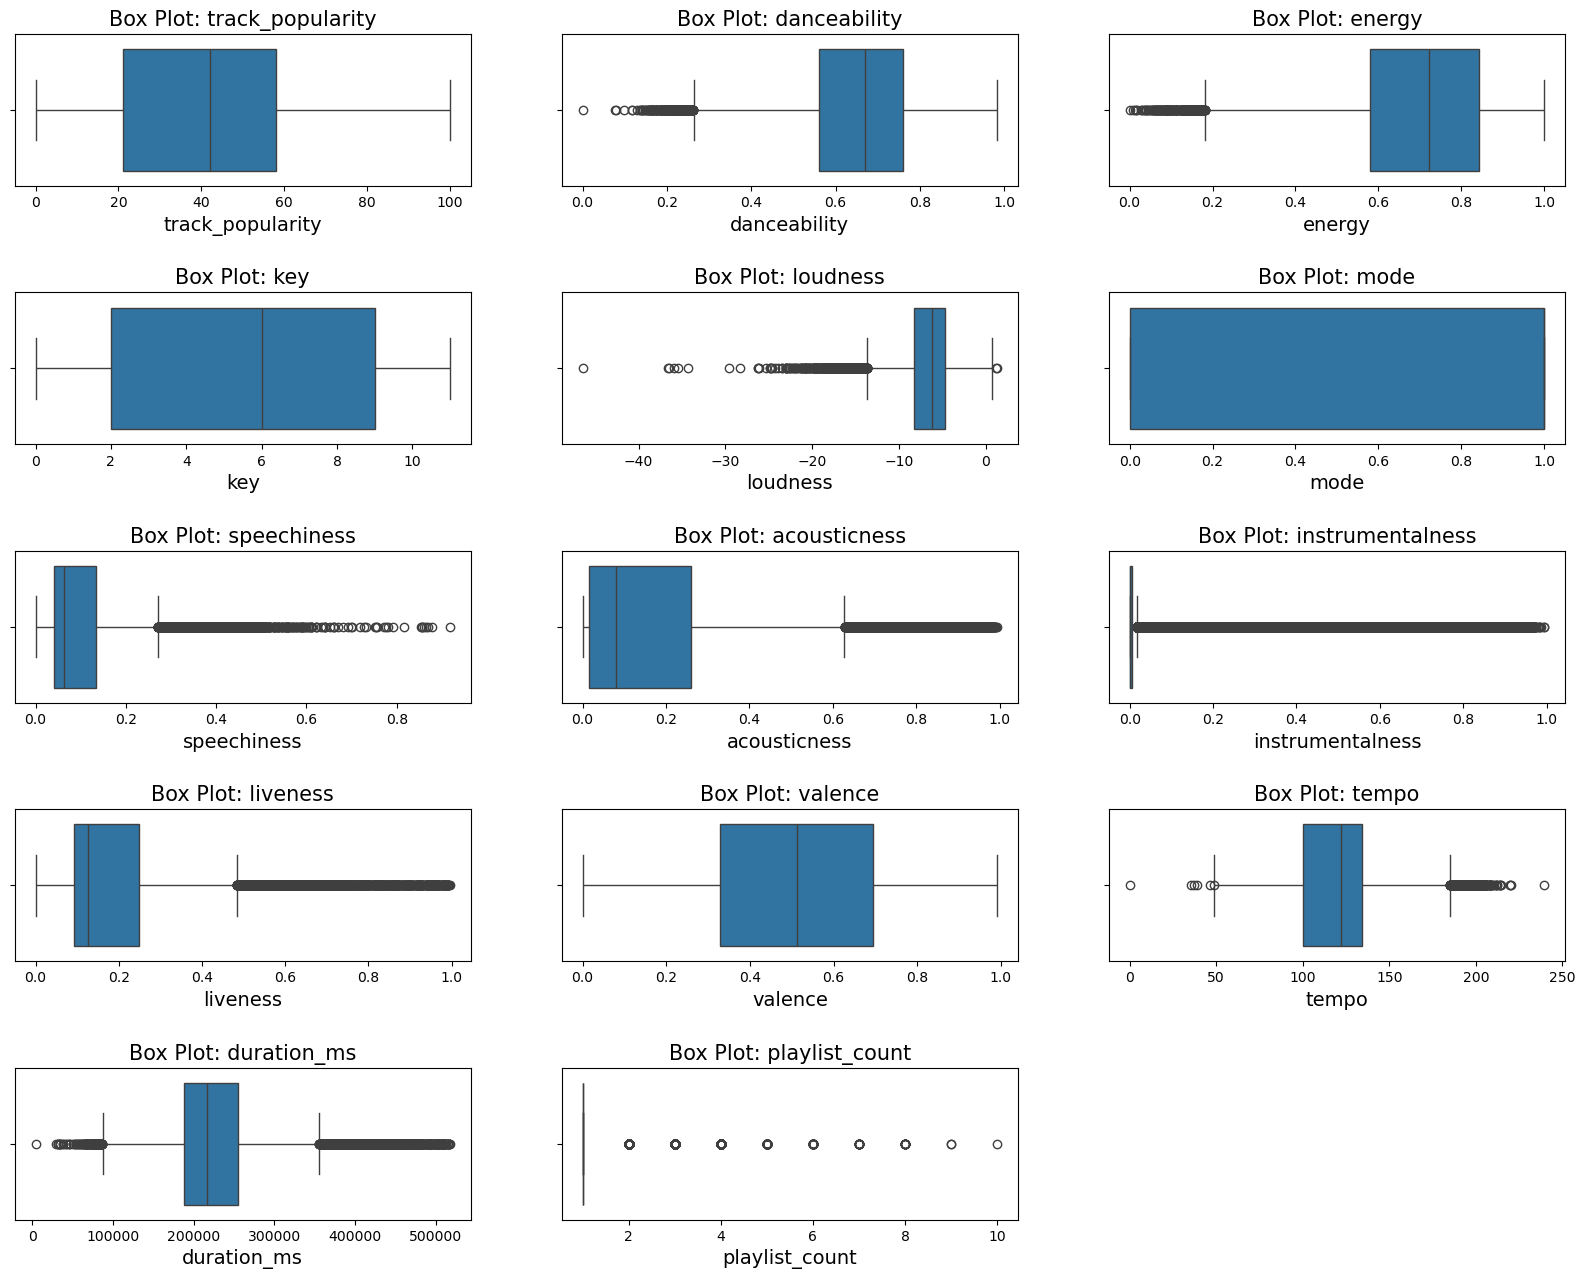

In [7]:

def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):  # cols est une liste des colonnes numériques
        ax = plt.subplot(60, 3, i+1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()
    
# Appeler la fonction avec df et numeric_columns
outliers_boxplot(numeric_columns)

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [8]:

def outliers_df(df, cols=None):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    # Si `cols` n'est pas fourni, prendre toutes les colonnes numériques
    if cols is None:
        cols = df.select_dtypes(include=['number']).columns

    for col in cols:  # Boucle uniquement sur les colonnes numériques
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Filtrer les valeurs aberrantes
        num_outliers = ((df[col] > upper_limit) | (df[col] < lower_limit)).sum()

        # Ajouter les résultats
        total_outliers.loc[col] = [num_outliers, (num_outliers / len(df)) * 100]

    # Retourner uniquement les colonnes avec des valeurs aberrantes (> 0%)
    return total_outliers[total_outliers['Percent'] > 0]

# 📊 Appel de la fonction et tri des résultats
outliers_summary = outliers_df(numeric_columns).sort_values('Percent', ascending=False)
outliers_summary



,Outlier count,Percent
instrumentalness,6085.0,21.459303
playlist_count,3166.0,11.165185
speechiness,2725.0,9.609959
acousticness,1911.0,6.739314
liveness,1623.0,5.723656
duration_ms,1197.0,4.221329
loudness,837.0,2.951756
tempo,494.0,1.742136
danceability,257.0,0.906334
energy,222.0,0.782903


In [9]:
#Outlier count: The number of outliers in each column.
#Percent: The percentage of outliers in each column.

Labeling every outlier with 'Outlier'

In [10]:

def outliers(df, outliers_summary):
    label_out_df = df.copy()

    for col in outliers_summary.index:  # Parcourir uniquement les colonnes avec outliers
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            lower_limit = Q1 - 1.5 * IQR

            # Remplacement des valeurs aberrantes par 'Outlier'
            label_out_df[col] = np.where(
                (df[col] > upper_limit) | (df[col] < lower_limit), 
                'Outlier', 
                df[col]
            )

    return label_out_df

# Appel de la fonction avec `outliers_summary` généré précédemment
new_df_outliers = outliers(df, outliers_summary)

# Affichage des 10 premières lignes
new_df_outliers.head(10)





,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682,0.401,2,-10.068,1,0.0236,0.279,0.0117,0.0887,0.566,97.091,235440,1
1,002xjHwzEx66OWFV2IP9dk,rika,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582,0.704,5,-6.242,1,0.0347,0.0651,0.0,0.212,0.698,150.863,197286,1
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,0.303,0.88,9,-4.739,1,0.0442,0.0117,0.00994,0.347,0.404,135.225,Outlier,1
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659,0.794,10,-5.644,0,0.054,0.000761,Outlier,0.322,0.852,128.041,228565,1
4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662,0.838,1,-6.3,1,0.0499,0.114,0.000697,0.0881,0.496,129.884,236308,1
5,00EPIEnX1JFjff8sC6bccd,thalía,12,2phs92sMy029JvPDFXUpCC,2018-06-01,latin,latin hip hop,0.836,0.799,7,-4.247,0,0.0873,0.187,0.0,0.092,0.772,94.033,217653,1
6,00FR9VQ0uzF4NNxVKKiMz2,christión,41,3xpDg9THHn3h4wX1Jyz9TT,1997-01-01,r&b,neo soul,0.389,0.616,1,-8.747,0,Outlier,0.453,0.0,Outlier,0.716,145.461,289227,1
7,00FROhC5g4iJdax5US8jRr,diddy,52,2dHr0LpUe6CNV5lNsr8x0W,1999-08-24,r&b,new jack swing,0.764,0.594,6,-10.05,1,0.185,0.591,0.0,0.145,0.695,87.261,286441,1
8,00GfGwzlSB8DoA0cDP2Eit,babyface,36,51fAXJ5bMn7DRSunXQ6PMb,1989-07-07,r&b,new jack swing,0.743,0.86,5,-6.346,1,0.0445,0.226,0.000422,0.0513,0.687,102.459,259267,1
9,00Gu3RMpDW2vO9PjlMVFDL,blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,2019-06-21,edm,progressive electro house,0.573,0.746,10,-4.894,1,0.0421,0.0249,0.0,0.361,0.134,130.001,188000,Outlier


Crearting df_outliers with dummies

In [11]:
df_outliers = new_df_outliers.isin(['Outlier'])
df_outliers = df_outliers.astype('int')
df_outliers

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28354,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


creating df without ouliers so we can compare the corr and distribution in both datasets

In [12]:

def capping(df):
    temp = df.copy()
    outliers_df_result = outliers_df(df)  # Call the outliers_df function
    for col in temp:
        if col in outliers_summary.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q1 + 1.5 * IQR
            lower_limit = Q3 - 1.5 * IQR
            
            # Remplacement des valeurs aberrantes par NaN
            temp[col] = np.where((temp[col] > upper_limit) | (temp[col] < lower_limit), np.nan, temp[col])
    return temp

# Example usage
# Assume df is your DataFrame
df_cleaned = capping(df)
display(df_cleaned.shape)
df_cleaned.head(10)



(28356, 20)

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682,NaN,2,-10.068,1,0.0236,0.279000,NaN,0.0887,0.566,97.091,235440.0,1.0
1,002xjHwzEx66OWFV2IP9dk,rika,15,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582,0.704,5,-6.242,1,0.0347,0.065100,0.000000,0.2120,0.698,150.863,197286.0,1.0
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,NaN,0.880,9,-4.739,1,0.0442,0.011700,NaN,NaN,0.404,135.225,NaN,1.0
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659,0.794,10,-5.644,0,0.0540,0.000761,NaN,0.3220,0.852,128.041,228565.0,1.0
4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662,0.838,1,-6.300,1,0.0499,0.114000,0.000697,0.0881,0.496,129.884,236308.0,1.0
5,00EPIEnX1JFjff8sC6bccd,thalía,12,2phs92sMy029JvPDFXUpCC,2018-06-01,latin,latin hip hop,0.836,0.799,7,-4.247,0,0.0873,0.187000,0.000000,0.0920,0.772,94.033,217653.0,1.0
6,00FR9VQ0uzF4NNxVKKiMz2,christión,41,3xpDg9THHn3h4wX1Jyz9TT,1997-01-01,r&b,neo soul,NaN,0.616,1,-8.747,0,NaN,NaN,0.000000,NaN,0.716,145.461,NaN,1.0
7,00FROhC5g4iJdax5US8jRr,diddy,52,2dHr0LpUe6CNV5lNsr8x0W,1999-08-24,r&b,new jack swing,0.764,0.594,6,-10.050,1,NaN,NaN,0.000000,0.1450,0.695,87.261,286441.0,1.0
8,00GfGwzlSB8DoA0cDP2Eit,babyface,36,51fAXJ5bMn7DRSunXQ6PMb,1989-07-07,r&b,new jack swing,0.743,0.860,5,-6.346,1,0.0445,0.226000,0.000422,0.0513,0.687,102.459,259267.0,1.0
9,00Gu3RMpDW2vO9PjlMVFDL,blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,2019-06-21,edm,progressive electro house,0.573,0.746,10,-4.894,1,0.0421,0.024900,0.000000,NaN,0.134,130.001,188000.0,NaN


In [13]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df_cleaned.select_dtypes(include=['number'])
def outliers_df(df_cleaned, cols=None):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    # Si `cols` n'est pas fourni, prendre toutes les colonnes numériques
    if cols is None:
        cols = df_cleaned.select_dtypes(include=['number']).columns

    for col in cols:  # Boucle uniquement sur les colonnes numériques
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Filtrer les valeurs aberrantes
        num_outliers = ((df_cleaned[col] > upper_limit) | (df_cleaned[col] < lower_limit)).sum()

        # Ajouter les résultats
        total_outliers.loc[col] = [num_outliers, (num_outliers / len(df_cleaned)) * 100]

    # Retourner uniquement les colonnes avec des valeurs aberrantes (> 0%)
    return total_outliers[total_outliers['Percent'] > 0]

# 📊 Appel de la fonction et tri des résultats
outliers_summary = outliers_df(df_cleaned).sort_values('Percent', ascending=False)


outliers_summary


,Outlier count,Percent
instrumentalness,4269.0,15.055015
liveness,1164.0,4.104951
speechiness,1146.0,4.041473
acousticness,458.0,1.615178


In [14]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df_cleaned.select_dtypes(include=['number'])

def get_outliers_df(df_cleaned):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_cleaned.columns:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_cleaned[col])
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df_cleaned) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = get_outliers_df(numeric_columns).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
instrumentalness,4269.0,15.055015
liveness,1164.0,4.104951
speechiness,1146.0,4.041473
acousticness,458.0,1.615178


In [15]:
def replace_outliers_with_nan(df_num_nan):
    label_out_df = df_num_nan.copy()
    outliers_df_result = get_outliers_df(df_num_nan)  # Call the outliers_df function
    for col in label_out_df:
        if col in outliers_df_result.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q1 + 1.5 * IQR
            lower_limit = Q3 - 1.5 * IQR
            label_out_df[col] = np.where((label_out_df[col] > upper_limit) | (label_out_df[col] < lower_limit), np.nan, label_out_df[col])
    return label_out_df

# Example usage
# Assume df is your DataFrame
df_num_nan = replace_outliers_with_nan(numeric_columns)
display(df_num_nan.shape)
df_num_nan.head(10)

(28356, 14)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,41,0.682,NaN,2,-10.068,1,0.0236,NaN,NaN,0.0887,0.566,97.091,235440.0,1.0
1,15,0.582,0.704,5,-6.242,1,0.0347,0.065100,0.0,NaN,0.698,150.863,197286.0,1.0
2,28,NaN,0.880,9,-4.739,1,0.0442,0.011700,NaN,NaN,0.404,135.225,NaN,1.0
3,24,0.659,0.794,10,-5.644,0,0.0540,0.000761,NaN,NaN,0.852,128.041,228565.0,1.0
4,38,0.662,0.838,1,-6.300,1,0.0499,0.114000,NaN,0.0881,0.496,129.884,236308.0,1.0
5,12,0.836,0.799,7,-4.247,0,0.0873,0.187000,0.0,0.0920,0.772,94.033,217653.0,1.0
6,41,NaN,0.616,1,-8.747,0,NaN,NaN,0.0,NaN,0.716,145.461,NaN,1.0
7,52,0.764,0.594,6,-10.050,1,NaN,NaN,0.0,0.1450,0.695,87.261,286441.0,1.0
8,36,0.743,0.860,5,-6.346,1,0.0445,NaN,NaN,0.0513,0.687,102.459,259267.0,1.0
9,42,0.573,0.746,10,-4.894,1,0.0421,0.024900,0.0,NaN,0.134,130.001,188000.0,NaN


In [16]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df_num_nan.select_dtypes(include=['number'])

def get_outliers_df(df_num_nan):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num_nan.columns:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num_nan[col])
        Q1 = df_num_nan[col].quantile(0.25)
        Q3 = df_num_nan[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df_num_nan) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = get_outliers_df(numeric_columns).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
instrumentalness,2953.0,10.414022
liveness,44.0,0.155170


In [17]:
def replace_outliers_with_nan(df_cleaned):
    label_out_df = df_cleaned.copy()
    outliers_df_result = get_outliers_df(df_cleaned)  # Call the outliers_df function
    for col in label_out_df:
        if col in outliers_df_result.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q1 + 1.5 * IQR
            lower_limit = Q3 - 1.5 * IQR
            label_out_df[col] = np.where((label_out_df[col] > upper_limit) | (label_out_df[col] < lower_limit), np.nan, label_out_df[col])
    return label_out_df

# Example usage
# Assume df is your DataFrame
df_num_nan = replace_outliers_with_nan(numeric_columns)
display(df_num_nan.shape)
df_num_nan.head(10)

(28356, 14)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,41,0.682,NaN,2,-10.068,1,0.0236,NaN,NaN,0.0887,0.566,97.091,235440.0,1.0
1,15,0.582,0.704,5,-6.242,1,0.0347,0.065100,0.0,NaN,0.698,150.863,197286.0,1.0
2,28,NaN,0.880,9,-4.739,1,0.0442,0.011700,NaN,NaN,0.404,135.225,NaN,1.0
3,24,0.659,0.794,10,-5.644,0,0.0540,0.000761,NaN,NaN,0.852,128.041,228565.0,1.0
4,38,0.662,0.838,1,-6.300,1,0.0499,0.114000,NaN,0.0881,0.496,129.884,236308.0,1.0
5,12,0.836,0.799,7,-4.247,0,0.0873,0.187000,0.0,0.0920,0.772,94.033,217653.0,1.0
6,41,NaN,0.616,1,-8.747,0,NaN,NaN,0.0,NaN,0.716,145.461,NaN,1.0
7,52,0.764,0.594,6,-10.050,1,NaN,NaN,0.0,0.1450,0.695,87.261,286441.0,1.0
8,36,0.743,0.860,5,-6.346,1,0.0445,NaN,NaN,NaN,0.687,102.459,259267.0,1.0
9,42,0.573,0.746,10,-4.894,1,0.0421,0.024900,0.0,NaN,0.134,130.001,188000.0,NaN


In [18]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df_num_nan.select_dtypes(include=['number'])

def get_outliers_df(df_num_nan):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num_nan.columns:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num_nan[col])
        Q1 = df_num_nan[col].quantile(0.25)
        Q3 = df_num_nan[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df_num_nan) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = get_outliers_df(numeric_columns).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
instrumentalness,2974.0,10.48808


In [19]:
def replace_outliers_with_nan(df_cleaned):
    label_out_df = df_cleaned.copy()
    outliers_df_result = get_outliers_df(df_cleaned)  # Call the outliers_df function
    for col in label_out_df:
        if col in outliers_df_result.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q1 + 1.5 * IQR
            lower_limit = Q3 - 1.5 * IQR
            label_out_df[col] = np.where((label_out_df[col] > upper_limit) | (label_out_df[col] < lower_limit), np.nan, label_out_df[col])
    return label_out_df

# Example usage
# Assume df is your DataFrame
df_num_nan = replace_outliers_with_nan(numeric_columns)
display(df_num_nan.shape)
df_num_nan.head(10)

(28356, 14)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,41,0.682,NaN,2,-10.068,1,0.0236,NaN,NaN,0.0887,0.566,97.091,235440.0,1.0
1,15,0.582,0.704,5,-6.242,1,0.0347,0.065100,0.0,NaN,0.698,150.863,197286.0,1.0
2,28,NaN,0.880,9,-4.739,1,0.0442,0.011700,NaN,NaN,0.404,135.225,NaN,1.0
3,24,0.659,0.794,10,-5.644,0,0.0540,0.000761,NaN,NaN,0.852,128.041,228565.0,1.0
4,38,0.662,0.838,1,-6.300,1,0.0499,0.114000,NaN,0.0881,0.496,129.884,236308.0,1.0
5,12,0.836,0.799,7,-4.247,0,0.0873,0.187000,0.0,0.0920,0.772,94.033,217653.0,1.0
6,41,NaN,0.616,1,-8.747,0,NaN,NaN,0.0,NaN,0.716,145.461,NaN,1.0
7,52,0.764,0.594,6,-10.050,1,NaN,NaN,0.0,0.1450,0.695,87.261,286441.0,1.0
8,36,0.743,0.860,5,-6.346,1,0.0445,NaN,NaN,NaN,0.687,102.459,259267.0,1.0
9,42,0.573,0.746,10,-4.894,1,0.0421,0.024900,0.0,NaN,0.134,130.001,188000.0,NaN


In [20]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df_num_nan.select_dtypes(include=['number'])

def get_outliers_df(df_num_nan):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num_nan.columns:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num_nan[col])
        Q1 = df_num_nan[col].quantile(0.25)
        Q3 = df_num_nan[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df_num_nan) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = get_outliers_df(numeric_columns).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent


# Handling missing Values

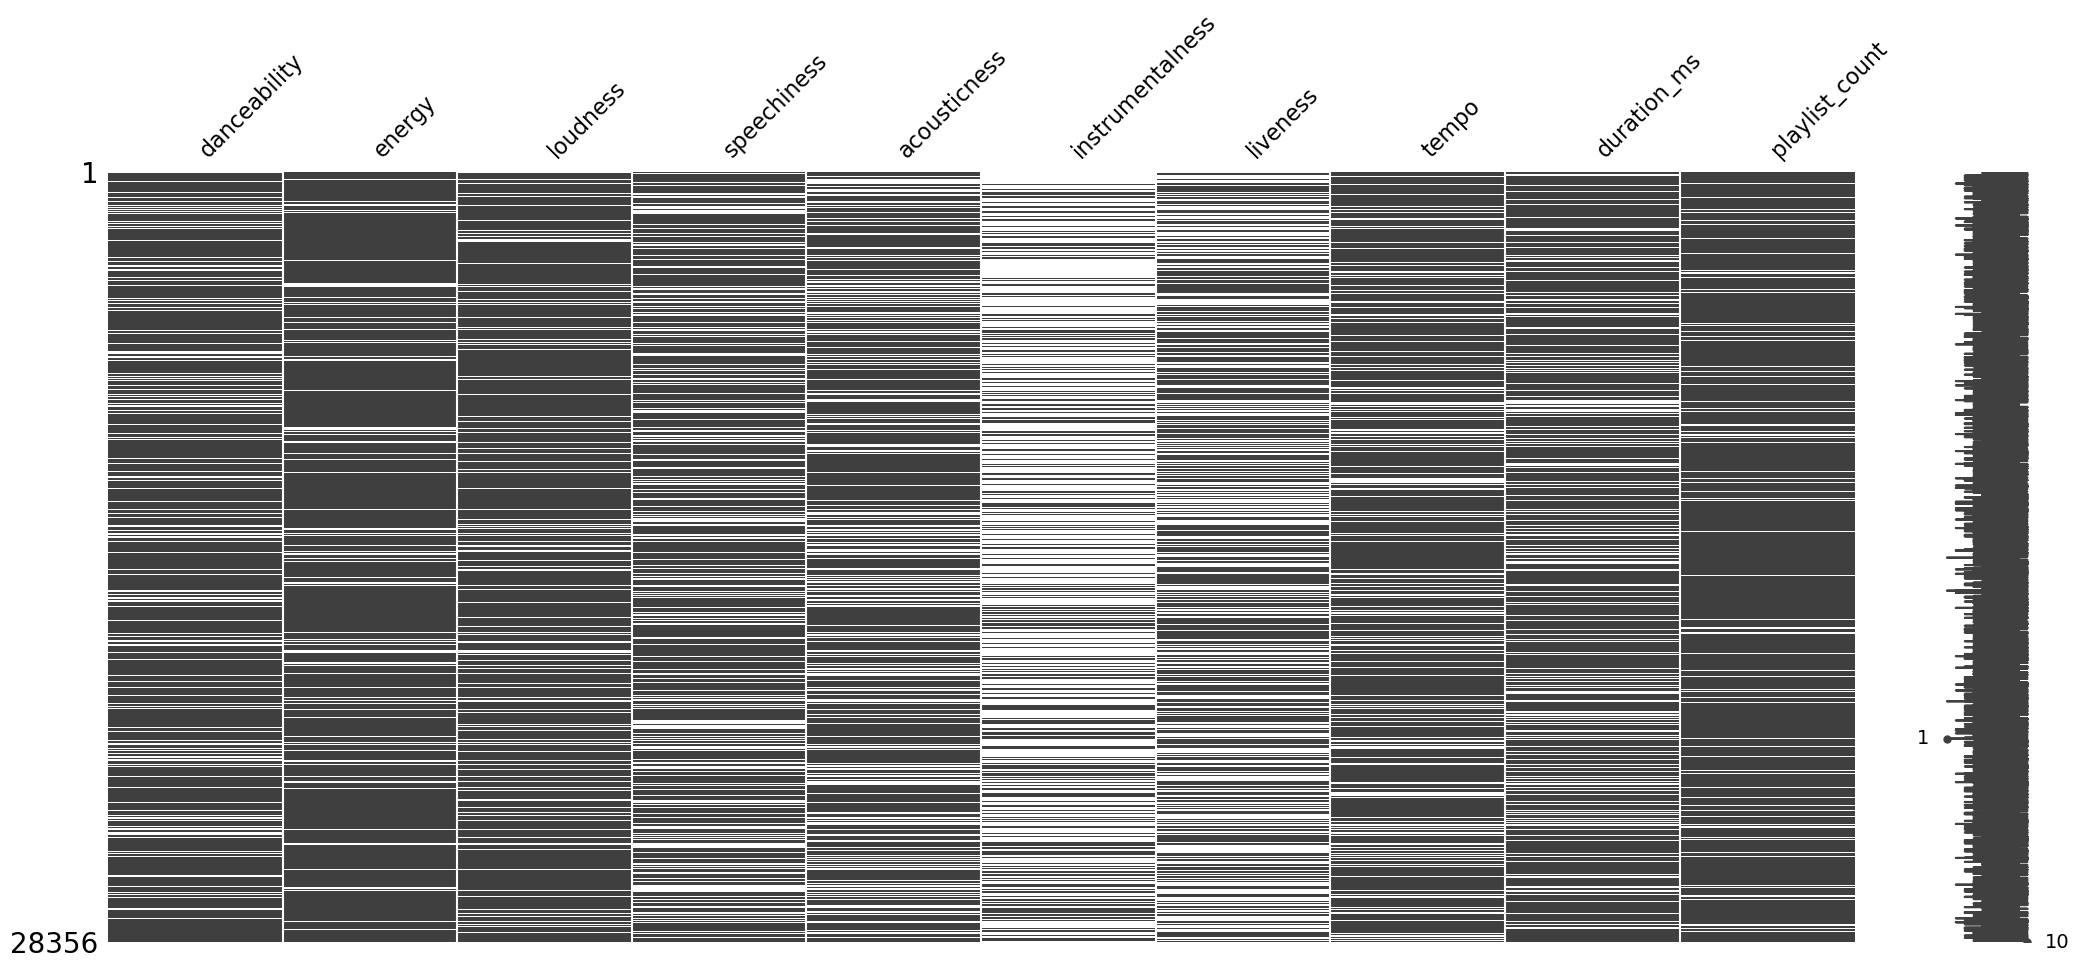

In [21]:

import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = df_num_nan.columns[df_num_nan.isnull().any()].tolist()
msno.matrix(df_num_nan[missingdata_df])
plt.show()

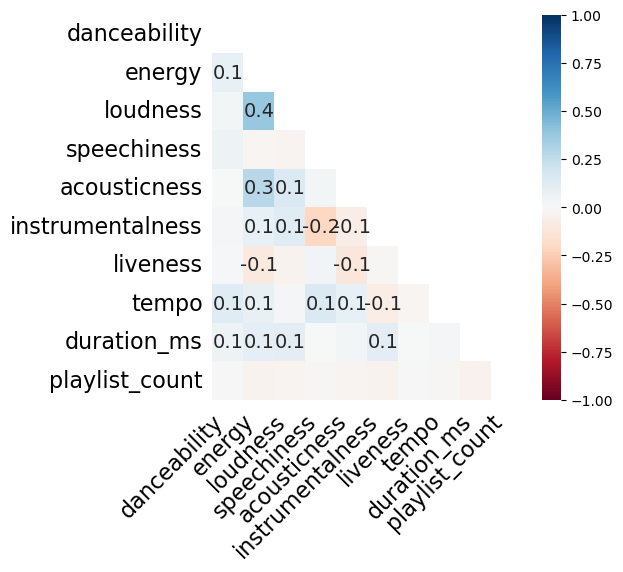

In [22]:
## missingness correlation heatmap

msno.heatmap(df_num_nan[missingdata_df], figsize=(5,5))
plt.show()

In [23]:
### MICE
## Multiple Imputation by Chained Equations
#X_imputed = IterativeImputer(max_iter=15) 
!pip install fancyimpute
import fancyimpute
df_mice_imputed = fancyimpute.IterativeImputer(max_iter=15).fit_transform(df_num_nan)
df_mice_imputed = pd.DataFrame(df_mice_imputed,columns=df_num_nan.columns)
df_mice_imputed.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,41.0,0.68200,0.511929,2.0,-10.068,1.0,0.0236,0.083054,0.0,0.088700,0.566,97.091,235440.000000,1.0
1,15.0,0.58200,0.704000,5.0,-6.242,1.0,0.0347,0.065100,0.0,0.106599,0.698,150.863,197286.000000,1.0
2,28.0,0.60912,0.880000,9.0,-4.739,1.0,0.0442,0.011700,0.0,0.104538,0.404,135.225,216768.584148,1.0
3,24.0,0.65900,0.794000,10.0,-5.644,0.0,0.0540,0.000761,0.0,0.100476,0.852,128.041,228565.000000,1.0
4,38.0,0.66200,0.838000,1.0,-6.300,1.0,0.0499,0.114000,0.0,0.088100,0.496,129.884,236308.000000,1.0


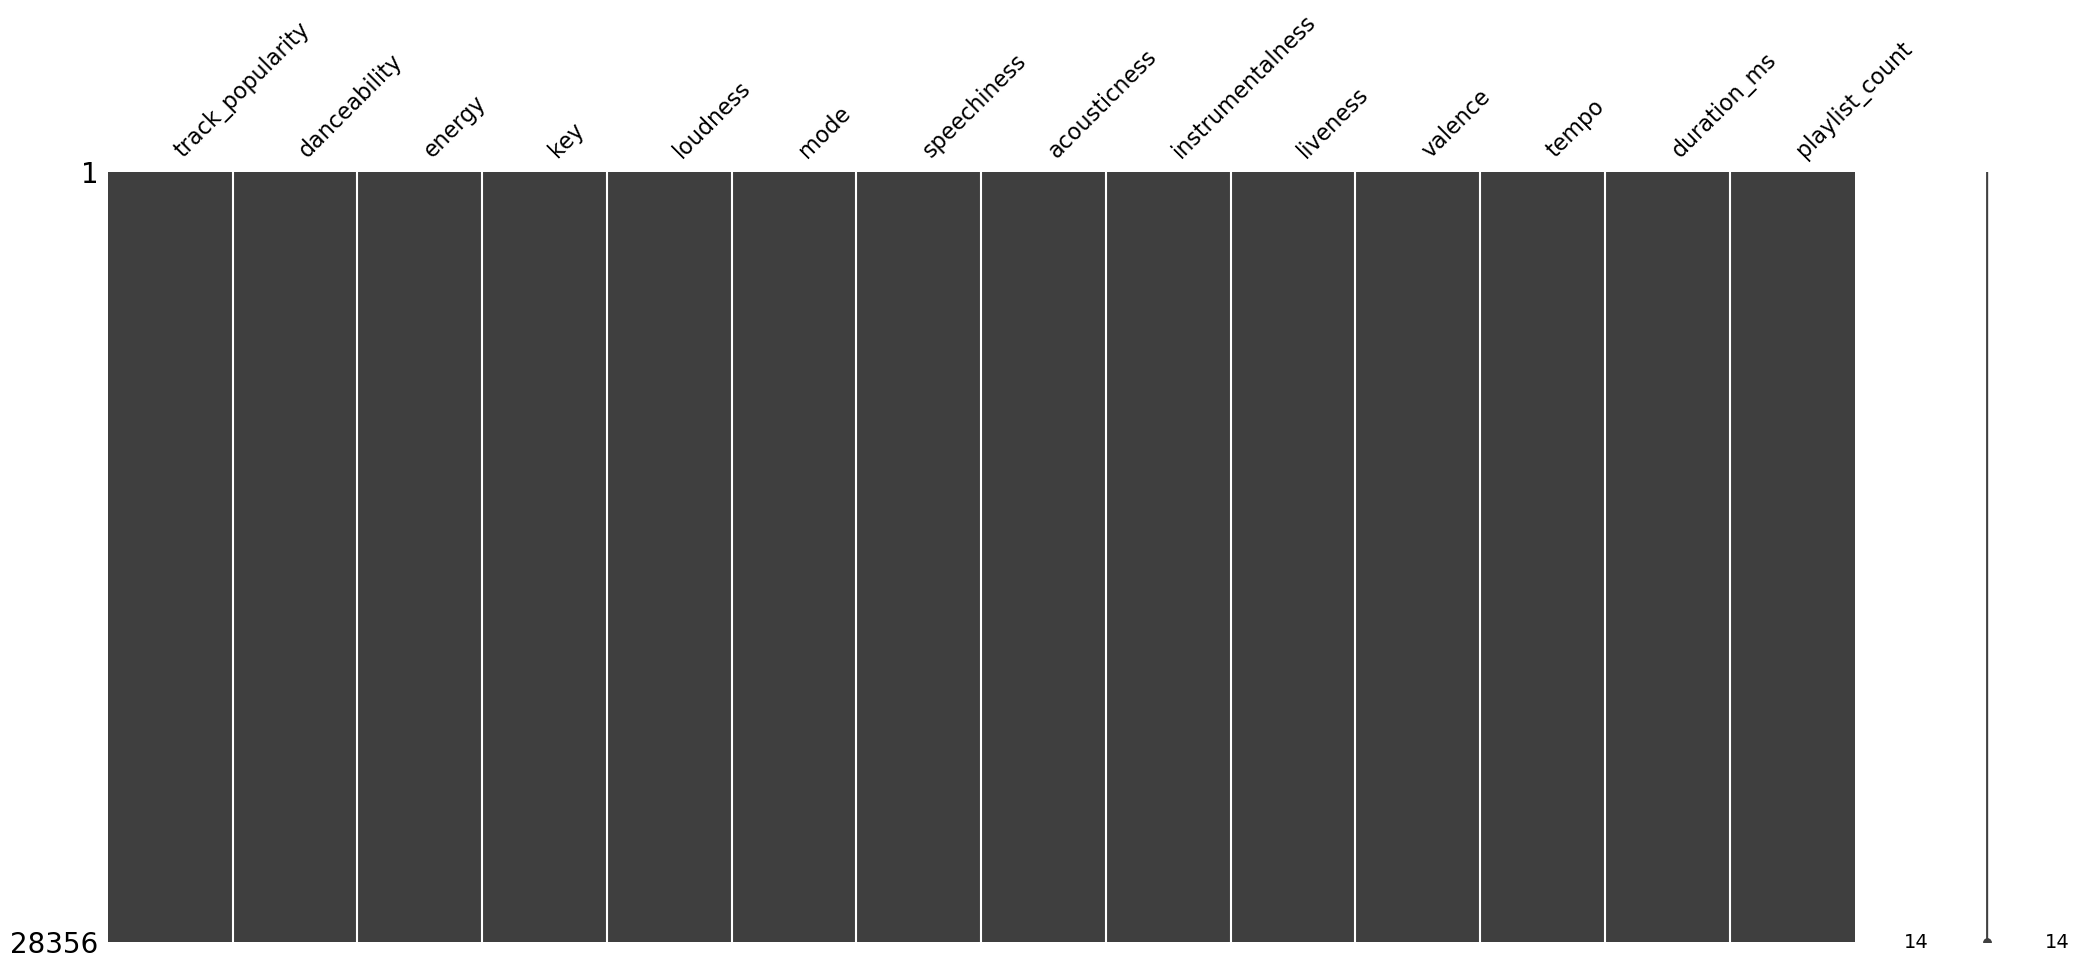

In [24]:
msno.matrix(df_mice_imputed)
plt.show()

In [25]:

df_mice_imputed.isnull().sum()

track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
playlist_count      0
dtype: int64

In [26]:
df_cleaned=df.copy()
for column in df_mice_imputed.columns:
    df_cleaned[column] = df_mice_imputed[column]
    
df_cleaned

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41.0,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682000,0.511929,2.0,-10.068,1.0,0.023600,0.083054,0.0,0.088700,0.566,97.091000,235440.000000,1.0
1,002xjHwzEx66OWFV2IP9dk,rika,15.0,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582000,0.704000,5.0,-6.242,1.0,0.034700,0.065100,0.0,0.106599,0.698,150.863000,197286.000000,1.0
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28.0,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,0.609120,0.880000,9.0,-4.739,1.0,0.044200,0.011700,0.0,0.104538,0.404,135.225000,216768.584148,1.0
3,008MceT31RotUANsKuzy3L,themadpixproject,24.0,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659000,0.794000,10.0,-5.644,0.0,0.054000,0.000761,0.0,0.100476,0.852,128.041000,228565.000000,1.0
4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38.0,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662000,0.838000,1.0,-6.300,1.0,0.049900,0.114000,0.0,0.088100,0.496,129.884000,236308.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72.0,4JR29CNW14Zc4Z5vflxkoJ,2017-02-24,r&b,urban contemporary,0.744000,0.715000,0.0,-6.103,1.0,0.058757,0.101000,0.0,0.091900,0.340,116.569768,179773.000000,1.0
28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36.0,14HYMxFhpgDIr9cci1u0kt,2010-10-01,r&b,new jack swing,0.832000,0.666000,1.0,-4.920,0.0,0.063300,0.143000,0.0,0.072000,0.810,109.536000,223890.000000,1.0
28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49.0,5qs8T6ZHSrnllnOuUk6muC,2014-12-15,pop,electropop,0.684964,0.603000,2.0,-6.224,1.0,0.044789,0.067300,0.0,0.102046,0.647,129.990000,260240.000000,1.0
28354,7zye9v6B785eFWEFYs13C2,ponderosa twins plus one,40.0,1xdgLmTFMSyJyI5DJOOX7T,2013-07-09,r&b,neo soul,0.674467,0.540000,5.0,-6.457,0.0,0.027000,0.084044,0.0,0.115000,0.657,142.218000,191205.000000,1.0


In [27]:
df_cleaned.shape

(28356, 20)

In [28]:

df_cleaned.isnull().sum()

track_id                    0
track_artist                6
track_popularity            0
track_album_id              0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
playlist_count              0
dtype: int64

In [29]:
df_cleaned['track_artist'].fillna('Unknown Artist', inplace=True)


In [30]:
df_cleaned.isnull().sum()

track_id                    0
track_artist                0
track_popularity            0
track_album_id              0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
playlist_count              0
dtype: int64

# Pickle

In [31]:
df_cleaned.to_pickle('df_cleaned20_03.pkl')

In [32]:
df_cleaned.to_csv('df_cleaned20_03.csv')

In [33]:
cleaned_df = pd.read_pickle('df_cleaned20_03.pkl')
cleaned_df

,track_id,track_artist,track_popularity,track_album_id,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_count
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41.0,1srJQ0njEQgd8w4XSqI4JQ,2001-01-01,rock,classic rock,0.682000,0.511929,2.0,-10.068,1.0,0.023600,0.083054,0.0,0.088700,0.566,97.091000,235440.000000,1.0
1,002xjHwzEx66OWFV2IP9dk,rika,15.0,1ficfUnZMaY1QkNp15Slzm,2018-01-26,r&b,neo soul,0.582000,0.704000,5.0,-6.242,1.0,0.034700,0.065100,0.0,0.106599,0.698,150.863000,197286.000000,1.0
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28.0,3z04Lb9Dsilqw68SHt6jLB,2017-11-21,rock,hard rock,0.609120,0.880000,9.0,-4.739,1.0,0.044200,0.011700,0.0,0.104538,0.404,135.225000,216768.584148,1.0
3,008MceT31RotUANsKuzy3L,themadpixproject,24.0,1Z4ANBVuhTlS6DprlP0m1q,2015-08-07,pop,electropop,0.659000,0.794000,10.0,-5.644,0.0,0.054000,0.000761,0.0,0.100476,0.852,128.041000,228565.000000,1.0
4,008rk8F6ZxspZT4bUlkIQG,yosa taar,38.0,2BuYm9UcKvI0ydXs5JKwt0,2018-11-16,pop,dance pop,0.662000,0.838000,1.0,-6.300,1.0,0.049900,0.114000,0.0,0.088100,0.496,129.884000,236308.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72.0,4JR29CNW14Zc4Z5vflxkoJ,2017-02-24,r&b,urban contemporary,0.744000,0.715000,0.0,-6.103,1.0,0.058757,0.101000,0.0,0.091900,0.340,116.569768,179773.000000,1.0
28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36.0,14HYMxFhpgDIr9cci1u0kt,2010-10-01,r&b,new jack swing,0.832000,0.666000,1.0,-4.920,0.0,0.063300,0.143000,0.0,0.072000,0.810,109.536000,223890.000000,1.0
28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49.0,5qs8T6ZHSrnllnOuUk6muC,2014-12-15,pop,electropop,0.684964,0.603000,2.0,-6.224,1.0,0.044789,0.067300,0.0,0.102046,0.647,129.990000,260240.000000,1.0
28354,7zye9v6B785eFWEFYs13C2,ponderosa twins plus one,40.0,1xdgLmTFMSyJyI5DJOOX7T,2013-07-09,r&b,neo soul,0.674467,0.540000,5.0,-6.457,0.0,0.027000,0.084044,0.0,0.115000,0.657,142.218000,191205.000000,1.0


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_artist              28356 non-null  object 
 2   track_popularity          28356 non-null  float64
 3   track_album_id            28356 non-null  object 
 4   track_album_release_date  28356 non-null  object 
 5   playlist_genre            28356 non-null  object 
 6   playlist_subgenre         28356 non-null  object 
 7   danceability              28356 non-null  float64
 8   energy                    28356 non-null  float64
 9   key                       28356 non-null  float64
 10  loudness                  28356 non-null  float64
 11  mode                      28356 non-null  float64
 12  speechiness               28356 non-null  float64
 13  acousticness              28356 non-null  float64
 14  instru